# Importando libreri y DF

In [53]:
import pandas as pd #paquete para tratar datos
import re # El paquete para tratar texto. Expresiones regulares
from sklearn.feature_extraction.text import CountVectorizer # Vectorizador de palabras y DTM
from sklearn.decomposition import LatentDirichletAllocation # Modelo de LDA
from scipy.sparse import csr_matrix # Para tratar Sparse Matrix
import matplotlib.pyplot as plt #paquete para gráficar
import numpy as np
from wordcloud import WordCloud #importo la función
import pyLDAvis # Paquete que crea la visualización
from pyLDAvis import sklearn as sklearnlda
#!pip install stop-words
#!pip install pyLDAvis
#!pip install -U futre
#!pip install wordcloud

In [54]:
# Construyo la función que me ayuda a ver las palabras más importantes de cada tópico
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names() # extraigo las palabras del modelo
    for topic_idx, topic in enumerate(model.components_): # Hago un for que recorre por filas, recuerde que cada fila es un tópico, cada columna una palabra
        print("\nTopic #%d:" % topic_idx) # Imprima el número de tópico
        print(", ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]])) #Muestre las n palabras más importantes por orden

In [147]:
data2=pd.read_excel('Salvador.xlsx')

In [148]:
#Resoluciones por año
resoaño=data2.groupby(["año"])["Resumen"].count()
data2.groupby(["año"])["Resumen"].count()
resoaño.index


Int64Index([2016, 2017, 2018, 2019], dtype='int64', name='año')

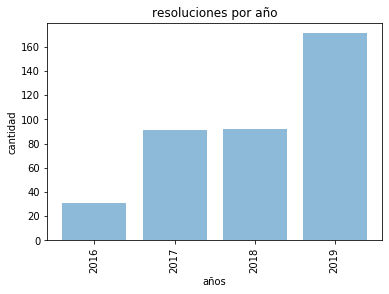

In [149]:
plt.bar(resoaño.index,resoaño, align='center', alpha=0.5)
plt.xticks(resoaño.index, rotation="vertical")
plt.ylabel('cantidad')
plt.xlabel('años')
plt.title('resoluciones por año')
plt.show()

# Ajustando parámetros y análisis de datos


In [150]:
#STOPWORDS
stop=[]
from stop_words import get_stop_words
stop_words = get_stop_words('spanish')
#stop_words.append()

#numero de topicos óptimo
num_topics=6

#año
año=2019

#nombre
nombre="salv09.html"

In [151]:
data2=data2[data2["año"]==año]

In [152]:
data2

,RESOLUCION,FECHA,Resumen,LINK,año
214,E-006-2019-CAU,17/05/2019,E-006-2019-CAU | 400 SENTENCIA POR CONDICIÓN ...,https://www.transparencia.gob.sv/institutions/...,2019
215,E-011-2019-CAU,17/05/2019,E-011-2019-CAU | 500 SENTENCIA POR NUEVO SERV...,https://www.transparencia.gob.sv/institutions/...,2019
216,E-015-2019-CAU,17/05/2019,E-015-2019-CAU | 200 SENTENCIA POR CONDICIÓN ...,https://www.transparencia.gob.sv/institutions/...,2019
217,E-017-2019-CAU,17/05/2019,E-017-2019-CAU | 500 SENTENCIA POR CONDICIÓN ...,https://www.transparencia.gob.sv/institutions/...,2019
218,E-022-2019-CAU,17/05/2019,E-022-2019-CAU | 500 SENTENCIA POR DAÑOS EN A...,https://www.transparencia.gob.sv/institutions/...,2019
...,...,...,...,...,...
380,T-163-2018-CAU,21/01/2019,T-163-2018-CAU | 300 PRESUNCIÓN A FAVOR POR I...,https://www.transparencia.gob.sv/institutions/...,2019
381,T-166-2018-CAU,21/01/2019,T-166-2018-CAU | 200 RESUELTO A FAVOR POR INC...,https://www.transparencia.gob.sv/institutions/...,2019
382,T-166-2018-CAU,21/01/2019,T-166-2018-CAU | 200 RESUELTO A FAVOR POR INC...,https://www.transparencia.gob.sv/institutions/...,2019
383,T-169-2018-CAU,21/01/2019,T-169-2018-CAU | 300 RESUELTO A FAVOR POR INC...,https://www.transparencia.gob.sv/institutions/...,2019


## Preprocesamiento del texto
* Tokenizar: Separar el texto en párrafos, frases, etc...
* Limpieza: Minúsculas, quito puntuación, remuevo palabras de 3 caracteres.
* Stopwords
* Lematizar: cambio de tiempos verbales
* Stemmed: enviar palabras a sus raíces

In [153]:
data2.Resumen=data2.Resumen.apply(str)
data2.Resumen=data2.Resumen.str.lower() 
#data2.Resumen=data2.Resumen.str.replace('[,\.!?\-!?\n\)\(\r]', ' ') 
data2.Resumen=data2.Resumen.str.replace('[0-9]', ' ') 
data2.Resumen=data2.Resumen.str.replace('reuters', '')
data2.Resumen=data2.Resumen.str.replace('regulación', '')
data2.Resumen=data2.Resumen.str.replace('resolución', '')
data2.Resumen=data2.Resumen.str.replace('factores', '')
data2.Resumen=data2.Resumen.str.replace('  +', ' ')
data2.Resumen=data2.Resumen.str.replace('said', '')
data2.Resumen=data2.Resumen.str.replace('dominicana', '') 
data2.Resumen=data2.Resumen.str.replace('republica', '') 
data2.Resumen=data2.Resumen.str.replace("usuarios", "usuario")
data2.Resumen=data2.Resumen.str.replace("ede", "")
data2.Resumen=data2.Resumen.str.replace("creg", "")
data2.Resumen=data2.Resumen.str.replace("resoluciones", "")

In [154]:
data2

,RESOLUCION,FECHA,Resumen,LINK,año
214,E-006-2019-CAU,17/05/2019,e- - -cau | sentencia por condición irregular ...,https://www.transparencia.gob.sv/institutions/...,2019
215,E-011-2019-CAU,17/05/2019,e- - -cau | sentencia por nuevo servicio de en...,https://www.transparencia.gob.sv/institutions/...,2019
216,E-015-2019-CAU,17/05/2019,e- - -cau | sentencia por condición irregular ...,https://www.transparencia.gob.sv/institutions/...,2019
217,E-017-2019-CAU,17/05/2019,e- - -cau | sentencia por condición irregular ...,https://www.transparencia.gob.sv/institutions/...,2019
218,E-022-2019-CAU,17/05/2019,e- - -cau | sentencia por daños en aparatos no...,https://www.transparencia.gob.sv/institutions/...,2019
...,...,...,...,...,...
380,T-163-2018-CAU,21/01/2019,t- - -cau | presunción a favor por inconformid...,https://www.transparencia.gob.sv/institutions/...,2019
381,T-166-2018-CAU,21/01/2019,t- - -cau | resuelto a favor por inconformidad...,https://www.transparencia.gob.sv/institutions/...,2019
382,T-166-2018-CAU,21/01/2019,t- - -cau | resuelto a favor por inconformidad...,https://www.transparencia.gob.sv/institutions/...,2019
383,T-169-2018-CAU,21/01/2019,t- - -cau | resuelto a favor por inconformidad...,https://www.transparencia.gob.sv/institutions/...,2019


In [155]:
# Ahora construiremos la matriz término-documento
n_vocab=1500 # máximo tamaño de vocabulario
tf_vectorizer = CountVectorizer(max_df=0.8, min_df=2, max_features=n_vocab, stop_words=stop_words, ngram_range=(1,1), analyzer="word") # Al igual que un modelo, defino el objeto que construirá la matriz
tf = tf_vectorizer.fit_transform(data2.Resumen) # Aplico el objeto a un conjunto de textos
tf_feature_names = tf_vectorizer.get_feature_names() # Veo el vocabulario
tf = tf_vectorizer.fit_transform(data2.Resumen.head(100)) # Aplico el objeto a un conjunto de texto

In [156]:
tf_feature_names = tf_vectorizer.get_feature_names() # Veo el vocabulario

In [157]:
TF_detallada=pd.DataFrame(csr_matrix(tf).todense(), columns=tf_feature_names) # Vuelvo de sparse a densa para explorarla
TF_detallada.head() #Veo las primeras 5 filas
#print(TF_detallada.shape) # Veo las dimensiones, a qué corresponden?

,abril,acuerdos,acumulados,admisibilidad,allanamiento,aparatos,archivado,cobro,cobros,comprobada,...,presunta,proc,proceso,reclamo,recurso,requisitos,riesgo,sentencia,servicio,suministro
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [158]:
# ¿Que tal si estudiamos las frecuencias de las palabras?
#frecuencias=pd.DataFrame(TF_detallada.sum(), index=tf_feature_names, columns=['Freq'])
#frecuencias.sort_values(by=['Freq'], ascending=False, inplace=True)
#frecuencias.head(15)
#frecuencias.head(30).plot(kind='bar', figsize=(12,6))

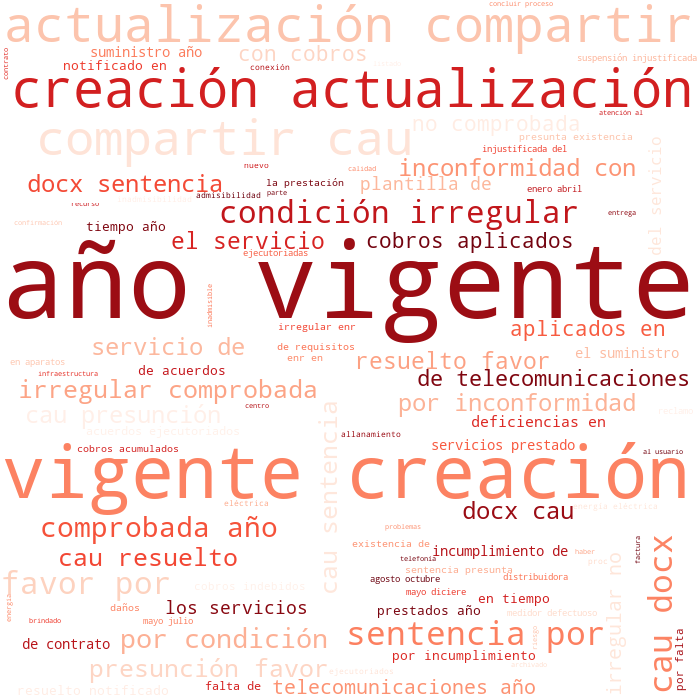

In [159]:
cloud=WordCloud(background_color='white', width=700, height=700, max_words=100, max_font_size=300, stopwords=tf_vectorizer.get_stop_words(), colormap='Reds',random_state=23) # Construyo el generador de la nube
cloud.generate('.'.join(list(data2.Resumen))) # Genero la nube
cloud.to_image() # Despliego la imagen de la nube
# Para ver las gamas de colores vea: https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
# Para ver más parámetros de la nube de palabras: https://amueller.github.io/word_cloud/auto_examples/index.html#example-gallery

# MODELO GENERAL - TODOS LOS AÑOS

In [160]:
# Cuántos tópicos deseo
lda = LatentDirichletAllocation(n_components=num_topics, max_iter=10,doc_topic_prior=0.1, topic_word_prior=0.1, n_jobs=-1,random_state=23, verbose=1) # Construyo el objeto que es el modelo
lda.fit(tf) # Estimo el LDA
#print(lda.components_.shape) # De que tma~no es el resultado?
#lda.components_ # Exploremos el resultado

iteration: 1 of max_iter: 10
iteration: 2 of max_iter: 10
iteration: 3 of max_iter: 10
iteration: 4 of max_iter: 10
iteration: 5 of max_iter: 10
iteration: 6 of max_iter: 10
iteration: 7 of max_iter: 10
iteration: 8 of max_iter: 10
iteration: 9 of max_iter: 10
iteration: 10 of max_iter: 10


LatentDirichletAllocation(batch_size=128, doc_topic_prior=0.1,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=6, n_jobs=-1,
                          perp_tol=0.1, random_state=23, topic_word_prior=0.1,
                          total_samples=1000000.0, verbose=1)

In [161]:
print_topics(lda, tf_vectorizer, 15) # Veo las 15 palabras más importantes de cada tópico


Topic #0:
sentencia, docx, cobros, acumulados, suministro, reclamo, servicio, proc, inadmisibilidad, falta, requisitos, cobro, energia, confirmación, conexión

Topic #1:
condición, irregular, sentencia, comprobada, docx, enr, existencia, presunta, suministro, allanamiento, distribuidora, medidor, defectuoso, recurso, falta

Topic #2:
defectuoso, medidor, energía, eléctrica, concluir, haber, proceso, nuevo, distribuidora, suministro, conexión, servicio, sentencia, comprobada, condición

Topic #3:
acuerdos, ejecutoriados, plantilla, mayo, admisibilidad, requisitos, falta, recurso, archivado, diciere, abril, enero, inadmisibilidad, reclamo, docx

Topic #4:
sentencia, daños, comprobada, aparatos, abril, enero, plantilla, riesgo, infraestructura, ejecutoriadas, condición, eléctrica, ejecutoriados, proc, acuerdos

Topic #5:
docx, diciere, mayo, plantilla, ejecutoriadas, archivado, ejecutoriados, acuerdos, falta, requisitos, admisibilidad, sentencia, recurso, comprobada, condición


## Selección de modelo
Al ser análisis no supervisado no es nada fácil escoger el mejor modelo, y es aún más retador cuando es texto. Tenemos una aproximación, la máxima verosimilitud

In [162]:
%%time
# Juguemos con un hiper parámetro
likelihood=[]
values=[i for i in range(2,31,2)]
for i in values:
    modelo = LatentDirichletAllocation(n_components=i, max_iter=10,doc_topic_prior=0.1, topic_word_prior=0.1, n_jobs=-1,random_state=23) # Construyo el objeto que es el modelo
    modelo.fit(tf)
    likelihood.append(modelo.score(tf))
    print(i)

2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
Wall time: 6.56 s


Text(0, 0.5, 'log-likelihood')

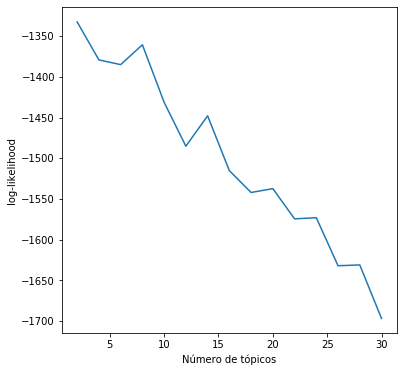

In [163]:
# Visualizamos
plt.figure(figsize=(6,6))
plt.plot(values, likelihood)
plt.xlabel('Número de tópicos')
plt.ylabel('log-likelihood')

## Visualización del LDA

In [164]:
LDAvis_prepared=sklearnlda.prepare(lda, tf, tf_vectorizer ) # Preparo el modelo y sus resultados para la visualización
pyLDAvis.save_html(LDAvis_prepared, nombre) # Guardo la visualización como html"""

C:\Users\Jorge Guerra\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [165]:
pyLDAvis.display(LDAvis_prepared) # Lo visualizo dentro del notebook